In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [2]:
# select random points
def init_centroids(X, k):
     m, n = X.shape
     centroids = np.zeros((k, n))
     idx = np.random.randint(0, m, k)
    
     for i in range(k):
         centroids[i,:] = X[idx[i],:] 
    
     return centroids


# centroid function
def find_closest_centroids(X, centroids):
      m = X.shape[0]
      k = centroids.shape[0]
      idx = np.zeros(m)

      for i in range(m):
          min_dist = 1000000
          for j in range(k):
              dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
              if dist < min_dist:
                  min_dist = dist
                  idx[i] = j
    
      return idx


# centroid maker
def compute_centroids(X, idx, k):
      m, n = X.shape
      centroids = np.zeros((k, n))
      
      for i in range(k):
          indices = np.where(idx == i)
          centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
           
      return centroids


# k means function
def run_k_means(X, initial_centroids, max_iters):
      m, n = X.shape
      k = initial_centroids.shape[0]
      idx = np.zeros(m)
      centroids = initial_centroids
    
      for i in range(max_iters):
          idx = find_closest_centroids(X, centroids)
          centroids = compute_centroids(X, idx, k)
    
      return idx, centroids


def pca(X):
      # normalize the features
      X = (X - X.mean()) / X.std()
    
      # compute the covariance matrix
      X = np.matrix(X)
      cov = (X.T * X) / X.shape[0]
     # print('cov \n', cov)
     # print()
      # perform SVD
      U, S, V = np.linalg.svd(cov) # singular value decomposition
    
      return U, S, V


def project_data(X, U, k):
      U_reduced = U[:,:k]
      return np.dot(X, U_reduced)



def recover_data(Z, U, k):
      U_reduced = U[:,:k]
      return np.dot(Z, U_reduced.T)

(300, 2)

[[5.14533035 4.13225692]
 [1.02062703 4.62991119]
 [6.5870565  3.37508345]]

[[3.85641411 1.94743305]
 [1.86859784 3.96439135]
 [6.24268945 2.77032569]]

[[3.15748851 1.13762754]
 [1.94403425 4.98654075]
 [6.14886585 3.00644011]]

[[3.04367119 1.01541041]
 [1.95399466 5.02557006]
 [6.03366736 3.00052511]]

[[3.04367119 1.01541041]
 [1.95399466 5.02557006]
 [6.03366736 3.00052511]]

[[3.04367119 1.01541041]
 [1.95399466 5.02557006]
 [6.03366736 3.00052511]]


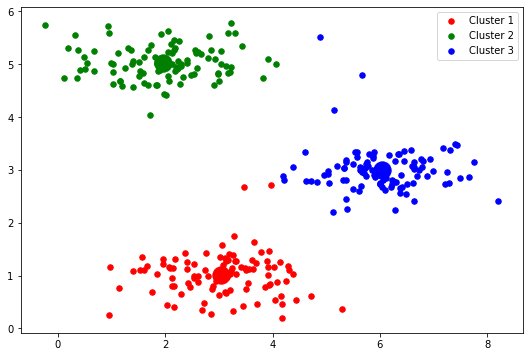

In [3]:
#load data
data = loadmat('ex7data2.mat')
print(data['X'].shape)
 
#classify points
X = data['X']
#initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
#initial_centroids = np.array([[8, 0], [8, 6], [0, 3]])
initial_centroids = init_centroids(X, 3)
# print(initial_centroids )

idx = find_closest_centroids(X, initial_centroids)  #Selection
# print(idx)

# calculate new centroid
c = compute_centroids(X, idx, 3)  #displacement
# print(c)  

for x in range(6):
  #apply k means
  idx, centroids = run_k_means(X, initial_centroids, x)
  #print(idx)
  print()
  print(centroids )

 # draw it
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(centroids[0,0],centroids[0,1],s=300, color='r')

ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(centroids[1,0],centroids[1,1],s=300, color='g')

ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(centroids[2,0],centroids[2,1],s=300, color='b')

ax.legend()

(128, 128, 3)
(16384, 3)


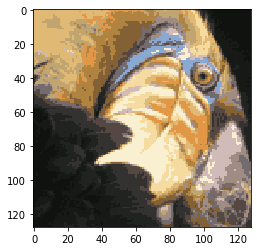

In [4]:
# Dimensional reduction
image_data = loadmat('bird_small.mat')

#print(image_data)

A = image_data['A']
print(A.shape)
#plt.imshow(A)

#normalize value ranges
A = A / 255.

#reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
print(X.shape)

#randomly initialize the centroids
initial_centroids = init_centroids(X, 16)
#print(initial_centroids)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]

# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

plt.imshow(X_recovered)

(50, 2)
(50, 2)


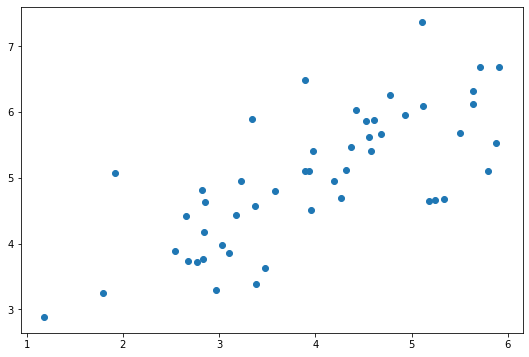

In [7]:
#PCA
data = loadmat('ex7data1.mat')
X = data['X']
print(X.shape)
#print(X)

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(X[:, 0], X[:, 1])
U, S, V = pca(X)
#print(U)
#print(S)
#print(V)

Z = project_data(X, U, 1)
#print(Z)
X_recovered = recover_data(Z, U, 1)
#print(X_recovered)
print(X_recovered.shape)


(5000, 1024)


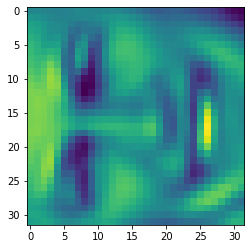

In [8]:
#  Apply PCA on faces
faces = loadmat('ex7faces.mat')
X = faces['X']
print(X.shape)
plt.imshow(X)

#show one face
face = np.reshape(X[41,:], (32, 32))
plt.imshow(face)
U, S, V = pca(X)
Z = project_data(X, U, 100)

X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[41,:], (32, 32))
plt.imshow(face) 